In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from joblib import dump
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv(r'C:\Users\MICRO\Documents\anzz\New US_Regional_Sales_Data.csv')

In [3]:
df

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,OrderYear,Total
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,2018-05-31,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,"1,001.18",1963,2018,1963
1,SO - 000102,Online,WARE-NMK1003,31/12/17,2018-05-31,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,"3,348.66",3939,2018,3939
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,2018-05-31,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,1775,2018,1775
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,2018-05-31,2/6/18,7/6/18,USD,28,48,107,23,8,0.075,"1,464.69",2324,2018,2324
4,SO - 000105,Distributor,WARE-NMK1003,10/4/18,2018-05-31,16/6/18,26/6/18,USD,22,49,111,26,8,0.100,"1,476.14",1822,2018,1822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0008087,In-Store,WARE-MKL1006,26/9/20,2020-12-30,7/1/21,14/1/21,USD,9,41,339,29,1,0.075,121.94,234,2020,234
7987,SO - 0008088,Online,WARE-NMK1003,26/9/20,2020-12-30,2/1/21,4/1/21,USD,14,29,202,3,6,0.050,"1,921.56",3202,2020,3202
7988,SO - 0008089,Online,WARE-UHY1004,26/9/20,2020-12-30,23/1/21,26/1/21,USD,14,32,241,35,5,0.200,"2,792.76",3825,2020,3825
7989,SO - 0008090,Online,WARE-NMK1003,26/9/20,2020-12-30,20/1/21,25/1/21,USD,20,42,112,36,8,0.100,804,1072,2020,1072


In [4]:
df['Order Quantity'] = df['Order Quantity'].replace(',', '', regex=True).astype(float)
df['Discount Applied'] = df['Discount Applied'].replace(',', '', regex=True).astype(float)
df['Unit Cost'] = df['Unit Cost'].replace(',', '', regex=True).astype(float)


df['Unit Price'] = df['Unit Price'].replace(',', '', regex=True).astype(float)

In [5]:
print(df.dtypes)


OrderNumber          object
Sales Channel        object
WarehouseCode        object
ProcuredDate         object
OrderDate            object
ShipDate             object
DeliveryDate         object
CurrencyCode         object
_SalesTeamID          int64
_CustomerID           int64
_StoreID              int64
_ProductID            int64
Order Quantity      float64
Discount Applied    float64
Unit Cost           float64
Unit Price          float64
OrderYear             int64
Total                 int64
dtype: object


In [6]:
df1=df

In [7]:
df1.head(2)

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,OrderYear,Total
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,2018-05-31,14/6/18,19/6/18,USD,6,15,259,12,5.0,0.075,1001.18,1963.0,2018,1963
1,SO - 000102,Online,WARE-NMK1003,31/12/17,2018-05-31,22/6/18,2/7/18,USD,14,20,196,27,3.0,0.075,3348.66,3939.0,2018,3939


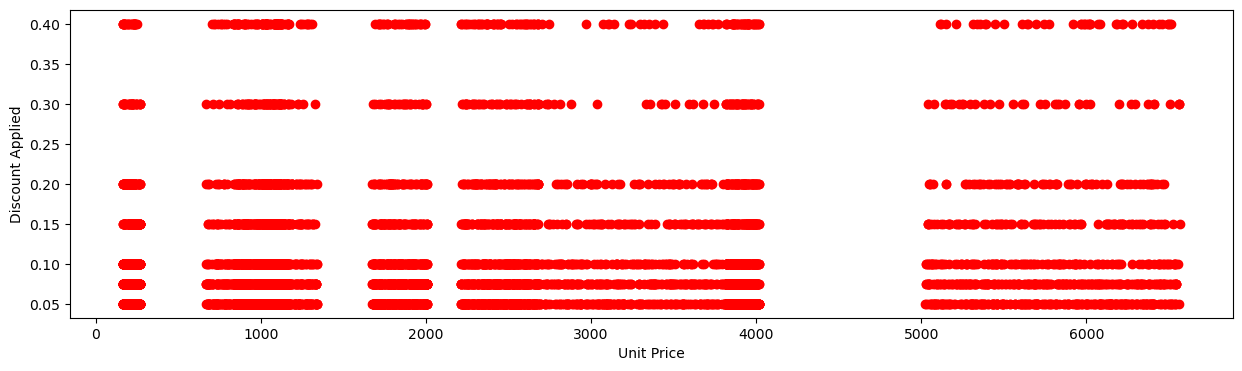

In [8]:
plt.figure(figsize=(15,4))
plt.xlabel('Unit Price')
plt.ylabel('Discount Applied')
plt.scatter(df1['Unit Price'],df1['Discount Applied'],color='Red')

plt.show()

In [9]:
# Linear Regression
df1.columns

Index(['OrderNumber', 'Sales Channel', 'WarehouseCode', 'ProcuredDate',
       'OrderDate', 'ShipDate', 'DeliveryDate', 'CurrencyCode', '_SalesTeamID',
       '_CustomerID', '_StoreID', '_ProductID', 'Order Quantity',
       'Discount Applied', 'Unit Cost', 'Unit Price', 'OrderYear', 'Total'],
      dtype='object')

In [10]:
df2=df1.drop(['Order Quantity','Discount Applied','Unit Cost','Unit Price'],axis=1)
model_data = df1[['Order Quantity','Discount Applied','Unit Cost','Unit Price']]

In [11]:
model_data

,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,5.0,0.075,1001.18,1963.0
1,3.0,0.075,3348.66,3939.0
2,1.0,0.050,781.22,1775.0
3,8.0,0.075,1464.69,2324.0
4,8.0,0.100,1476.14,1822.0
...,...,...,...,...
7986,1.0,0.075,121.94,234.0
7987,6.0,0.050,1921.56,3202.0
7988,5.0,0.200,2792.76,3825.0
7989,8.0,0.100,804.00,1072.0


In [12]:
refined = model_data[['Order Quantity','Discount Applied','Unit Cost']]

In [13]:
ind=model_data[['Unit Price']]

In [14]:
xtrain,xtest,ytrain,ytest=train_test_split(refined,ind,test_size=0.2)

In [15]:
xtrain

,Order Quantity,Discount Applied,Unit Cost
773,6.0,0.075,1378.19
6866,4.0,0.150,3667.58
4419,4.0,0.075,3230.94
787,2.0,0.050,80.13
7200,5.0,0.075,85.16
...,...,...,...
4924,2.0,0.100,120.60
1972,2.0,0.075,1460.60
7107,2.0,0.150,1034.75
3670,8.0,0.075,2021.73


In [16]:
xtest

,Order Quantity,Discount Applied,Unit Cost
5529,3.0,0.050,984.63
3625,5.0,0.150,157.58
4918,3.0,0.050,1199.30
7067,1.0,0.200,137.35
7947,8.0,0.050,1351.66
...,...,...,...
5088,7.0,0.100,124.82
109,7.0,0.100,517.37
5739,7.0,0.075,488.83
2135,7.0,0.050,1154.54


In [17]:
ytrain

,Unit Price
773,2505.0
6866,5393.0
4419,3892.0
787,174.0
7200,207.0
...,...
4924,201.0
1972,2921.0
7107,1916.0
3670,2378.0


In [18]:
ytest

,Unit Price
5529,2237.0
3625,187.0
4918,2398.0
7067,167.0
7947,1755.0
...,...
5088,180.0
109,958.0
5739,857.0
2135,2405.0


In [19]:
lin_mod=linear_model.LinearRegression()

In [20]:
lin_mod.fit(xtrain,ytrain)

LinearRegression()

In [21]:
lin_mod.predict([[5.0,0.075,1001.18]])

C:\Users\MICRO\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1673.59494377]])

In [22]:
lin_mod.score(xtrain,ytrain)

0.8871922902552254

In [23]:
lin_mod.predict(xtest)

array([[1647.95838663],
       [ 475.14435131],
       [1952.826603  ],
       ...,
       [ 948.23409782],
       [1893.78777294],
       [2501.23360397]])

In [24]:
lin_mod.predict([[8.0,0.07,686.82]])

C:\Users\MICRO\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1230.57212601]])

In [25]:
# Random Forest Classifier
df1.columns

Index(['OrderNumber', 'Sales Channel', 'WarehouseCode', 'ProcuredDate',
       'OrderDate', 'ShipDate', 'DeliveryDate', 'CurrencyCode', '_SalesTeamID',
       '_CustomerID', '_StoreID', '_ProductID', 'Order Quantity',
       'Discount Applied', 'Unit Cost', 'Unit Price', 'OrderYear', 'Total'],
      dtype='object')

In [26]:
df2=df1.drop(['Order Quantity','Discount Applied','Unit Cost','Unit Price'],axis=1)
model = df1[['Order Quantity','Discount Applied','Unit Cost','Unit Price']]

In [27]:
model

,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,5.0,0.075,1001.18,1963.0
1,3.0,0.075,3348.66,3939.0
2,1.0,0.050,781.22,1775.0
3,8.0,0.075,1464.69,2324.0
4,8.0,0.100,1476.14,1822.0
...,...,...,...,...
7986,1.0,0.075,121.94,234.0
7987,6.0,0.050,1921.56,3202.0
7988,5.0,0.200,2792.76,3825.0
7989,8.0,0.100,804.00,1072.0


In [28]:
reg = model[['Order Quantity','Discount Applied','Unit Cost']]

In [29]:
ind=model[['Unit Price']]

In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(reg,ind,test_size=0.2)

In [31]:
xtrain

,Order Quantity,Discount Applied,Unit Cost
7168,6.0,0.05,4280.90
5547,3.0,0.05,1785.95
7234,2.0,0.20,671.14
2029,2.0,0.40,78.39
5221,5.0,0.20,1304.49
...,...,...,...
6453,3.0,0.05,1267.91
3710,2.0,0.05,2890.78
1592,8.0,0.40,2393.24
166,7.0,0.20,502.50


In [32]:
xtest

,Order Quantity,Discount Applied,Unit Cost
5954,3.0,0.10,1869.90
665,2.0,0.30,2725.76
2231,2.0,0.40,2632.56
3772,7.0,0.15,164.15
2922,4.0,0.15,2237.13
...,...,...,...
7293,2.0,0.15,149.54
5566,4.0,0.10,2776.48
4729,6.0,0.10,1122.79
3153,5.0,0.20,528.50


In [33]:
ytrain

,Unit Price
7168,6204.0
5547,2626.0
7234,1065.0
2029,174.0
5221,2371.0
...,...
6453,2224.0
3710,6150.0
1592,5983.0
166,1005.0


In [34]:
model = RandomForestClassifier()

In [35]:
model.fit(xtrain,ytrain)

C:\Users\MICRO\AppData\Local\Temp\ipykernel_6860\317747127.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain,ytrain)


RandomForestClassifier()

In [36]:
model.score(xtrain,ytrain)

0.9956195244055068

In [37]:
joblib.dump(lin_mod,'Us Regional Sales')

['Us Regional Sales']

In [71]:
# Decision Tree
df1.columns

Index(['OrderNumber', 'Sales Channel', 'WarehouseCode', 'ProcuredDate',
       'OrderDate', 'ShipDate', 'DeliveryDate', 'CurrencyCode', '_SalesTeamID',
       '_CustomerID', '_StoreID', '_ProductID', 'Order Quantity',
       'Discount Applied', 'Unit Cost', 'Unit Price', 'OrderYear', 'Total'],
      dtype='object')

In [59]:
inputs=df1.drop(['Unit Price'],axis='columns')


In [60]:
target=df1['Unit Price']


In [61]:
encoder=LabelEncoder()

Order_Quantity = encoder.fit_transform(inputs['Order Quantity'])
Discount_Applied = encoder.fit_transform(inputs['Discount Applied'])
Unit_Cost = encoder.fit_transform(inputs['Unit Cost'])

In [62]:
inputs['Order Quantity']=Order_Quantity
inputs['Discount Applied']=Discount_Applied 
inputs['Unit Cost']=Unit_Cost


In [63]:
model=tree.DecisionTreeClassifier()

In [65]:
print(inputs.head())  
print(inputs.dtypes)

   OrderNumber Sales Channel WarehouseCode ProcuredDate   OrderDate ShipDate  \
0  SO - 000101      In-Store  WARE-UHY1004     31/12/17  2018-05-31  14/6/18   
1  SO - 000102        Online  WARE-NMK1003     31/12/17  2018-05-31  22/6/18   
2  SO - 000103   Distributor  WARE-UHY1004     31/12/17  2018-05-31  21/6/18   
3  SO - 000104     Wholesale  WARE-NMK1003     31/12/17  2018-05-31   2/6/18   
4  SO - 000105   Distributor  WARE-NMK1003      10/4/18  2018-05-31  16/6/18   

  DeliveryDate CurrencyCode  _SalesTeamID  _CustomerID  _StoreID  _ProductID  \
0      19/6/18          USD             6           15       259          12   
1       2/7/18          USD            14           20       196          27   
2       1/7/18          USD            21           16       213          16   
3       7/6/18          USD            28           48       107          23   
4      26/6/18          USD            22           49       111          26   

   Order Quantity  Discount Applied  U

In [66]:
# One hot encoding
inputs = pd.get_dummies(inputs, drop_first=True)


In [67]:
model.fit(inputs,target)

DecisionTreeClassifier()

In [68]:
data=model.score(inputs,target)

In [69]:
data

1.0

In [70]:
joblib.dump(data,'New Us Regional Sales')

['New Us Regional Sales']